In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [4]:
X,y = datasets.make_classification(100,2,n_redundant=0, n_informative=1,
                           random_state=20, n_clusters_per_class=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

Text(0, 0.5, 'feature 2')

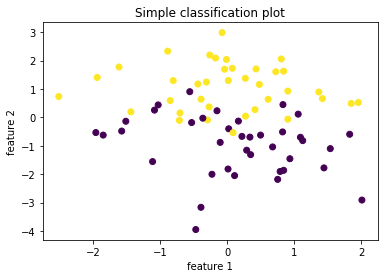

In [6]:
fig, ax = plt.subplots()
ax.scatter(X_train[:,0],X_train[:,1],c=y_train)
ax.set_title('Simple classification plot')
plt.xlabel("feature 1")
plt.ylabel("feature 2")

In [7]:
def train_model(x_train,y_train,layer_shape,optimizer):
    # layer shape is in a python list [20,20,20]
    #solver options => solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
    model = MLPClassifier(hidden_layer_sizes=(layer_shape), max_iter=10000, alpha=0.000000001,
                         solver=optimizer, verbose=False,random_state=21,tol=0.000000001,learning_rate="adaptive")
    model.fit(x_train, y_train)
    return model
#optimizer options => solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’ for MLPClassifier and regressor
optimizer = 'adam'
layer_shape = [20,20]
clf1 = train_model(X_train,y_train,layer_shape,optimizer)
clf2 = train_model(X_train,y_train,[20,20,20],optimizer)
clf3 = train_model(X_train,y_train,[100,100],optimizer)
clf_list = [clf1,clf2,clf2]

d:\anaconda3\envs\pytorch\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\anaconda3\envs\pytorch\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [8]:
step = 0.05
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))

In [9]:
clf1.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1].shape

(17649,)

Z before (17649,)
xx (159, 111)
(159, 111)
Z before (17649,)
xx (159, 111)
(159, 111)
Z before (17649,)
xx (159, 111)
(159, 111)


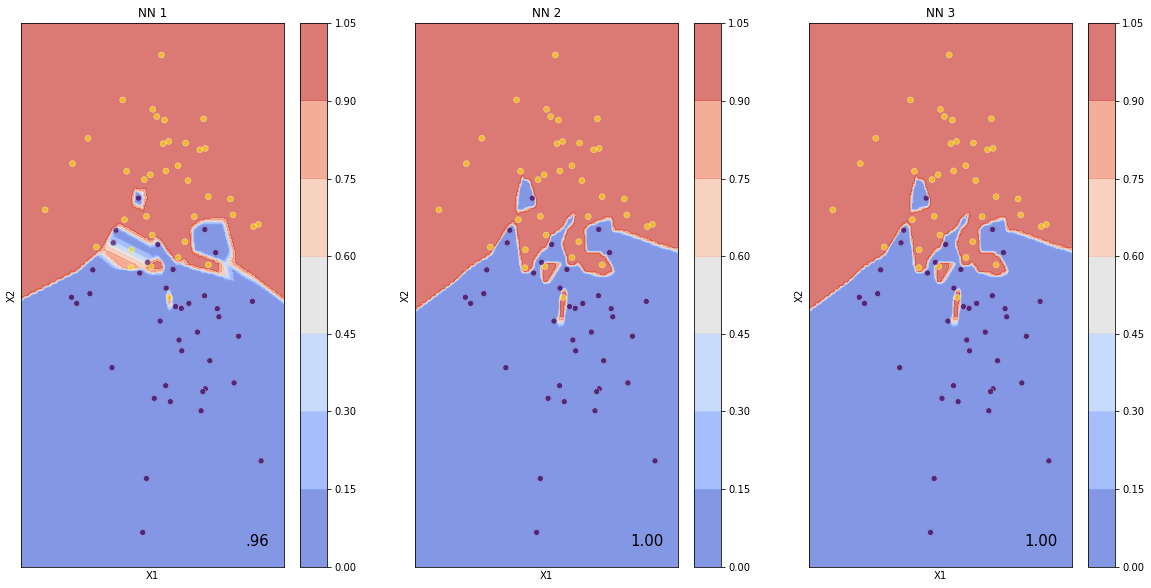

In [11]:
figure = plt.figure(figsize=(20, 10))
for i, clf in enumerate(clf_list):
    
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    print("Z before",Z.shape)
    print("xx",xx.shape)
    Z = Z.reshape(xx.shape)
    print(Z.shape)
    # just plot the dataset first
    cm = plt.cm.RdBu
    #cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    cm_bright = ListedColormap(['white', '#0000FF'])
    ax = plt.subplot(1,3,i+1)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.7)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    plt.xlabel("X1")
    plt.ylabel("X2")
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        #Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #ax.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=0.8)
    contour = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.7)
    plt.colorbar(contour) 
    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.6, linewidths=0.6, edgecolors="white")
    # and testing points
    #ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
    #           alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("NN "+str(i+1))
    score = clf.score(X_test, y_test)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')